In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Highlighting your data

### Hardcoding a highlight

In [186]:
pollution = pd.read_csv('pollution_tidy.csv')
pollution.head()

,state,city,pollutant,value,year,month,day
0,Alaska,Fairbanks,CO,0.315,2014,7,182
1,Alaska,Fairbanks,NO2,4.100,2014,7,182
2,Alaska,Fairbanks,O3,0.017,2014,7,182
3,Alaska,Fairbanks,SO2,4.250,2014,7,182
4,Alaska,Fairbanks,CO,0.305,2014,7,183


In [187]:
pollution = pd.pivot_table(pollution, values = 'value', index = ['state', 'city', 'year', 'month', 'day'], columns = 'pollutant').reset_index()
pollution.columns.name = None
pollution.head()

,state,city,year,month,day,CO,NO2,O3,SO2
0,Alaska,Fairbanks,2014,7,182,0.315,4.1,0.017,4.25
1,Alaska,Fairbanks,2014,7,183,0.305,4.2,0.016,4.65
2,Alaska,Fairbanks,2014,7,184,0.315,6.1,0.021,7.90
3,Alaska,Fairbanks,2014,7,185,0.295,14.0,0.030,8.05
4,Alaska,Fairbanks,2014,7,186,0.325,10.9,0.035,5.40


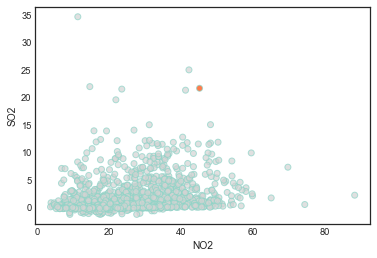

In [188]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

### Programmatically creating a highlight

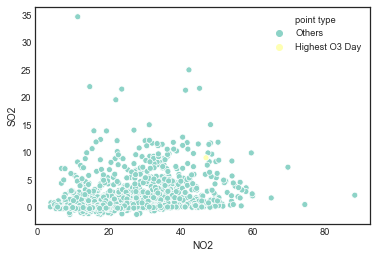

In [189]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point type',
                data = houston_pollution)
plt.show()

### Comparing with two KDEs

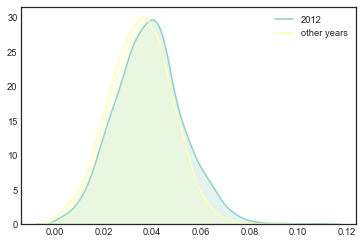

In [190]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

### Improving your KDEs

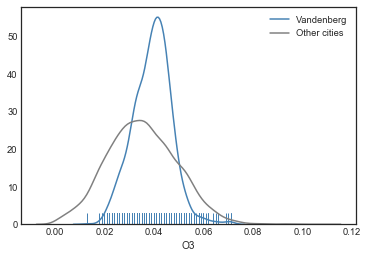

In [191]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg',
                # Turn of the histogram and color blue to stand out
               hist = False, 
             color = 'steelblue',  
               # Turn on rugplot
               rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3,
             label = 'Other cities',
               # Turn off histogram and color gray
               hist = False,
             color = 'gray')
plt.show()

### Beeswarms

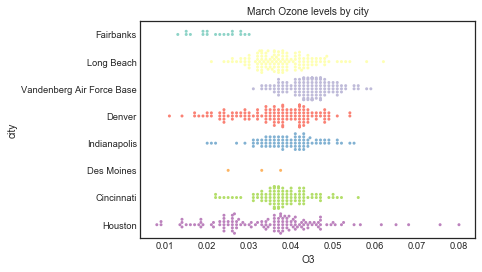

In [192]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

### A basic text annotation

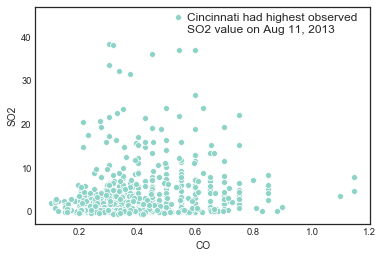

In [193]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

### Arrow annotations

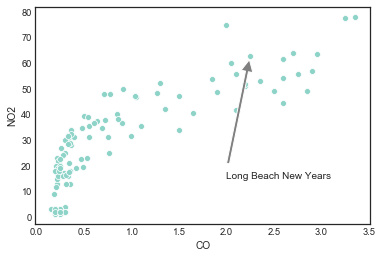

In [194]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

### Combining annotations and color

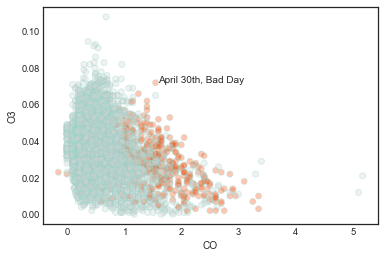

In [195]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

## Using color in your visualizations

### Getting rid of unnecessary color

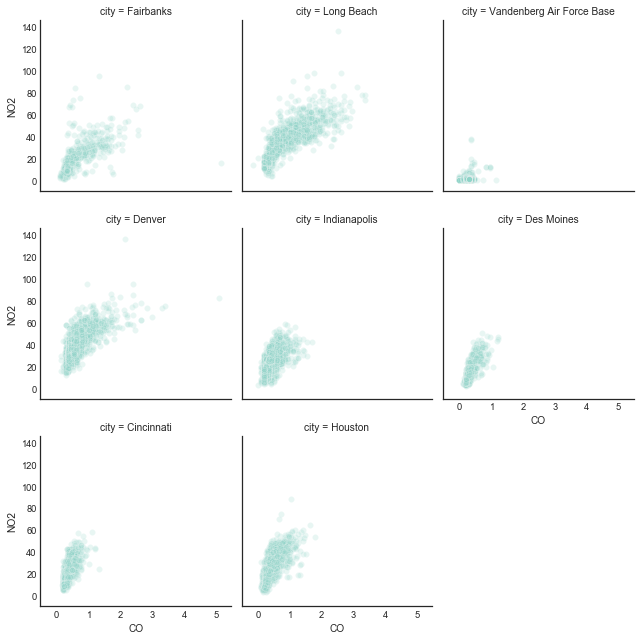

In [196]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

### Fixing Seaborn's bar charts

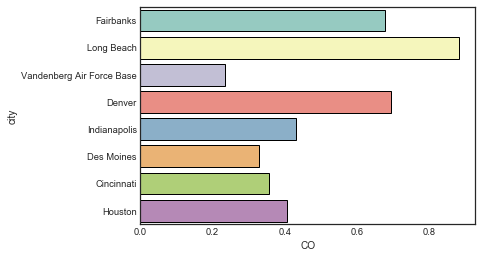

In [197]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor  = 'black')
plt.show()

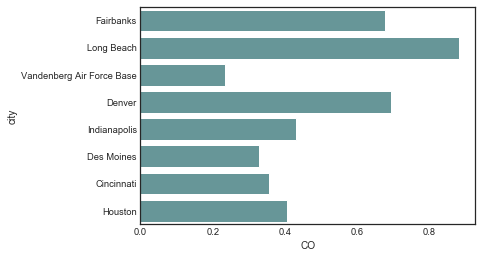

In [198]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
            color = 'cadetblue')
plt.show()

### Making a custom continuous palette

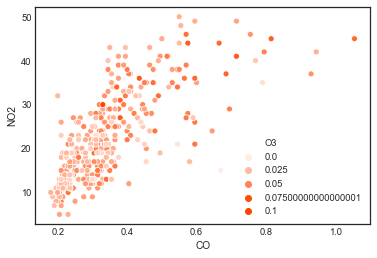

In [199]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                                  as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                  data = cinci_2014,
                palette = color_palette)
plt.show()

### Customizing a diverging palette heatmap

In [200]:
df = pollution.query("(month  ==  11) & (year  ==  2015)")[['city','day','CO']]
nov_2015_CO = pd.pivot_table(data = df, columns = 'day', index = 'city', values = 'CO')

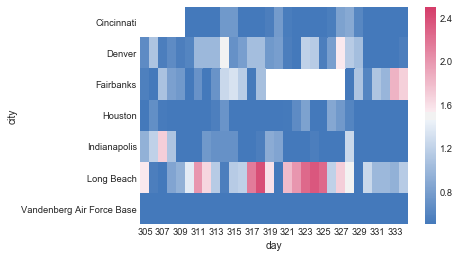

In [201]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 1.5,
            vmin = 0.5,
            vmax = 2.5)
plt.yticks(rotation = 0)
plt.show()

### Adjusting your palette according to context

In [202]:
df = pollution.query("(month  ==  10) & (year  ==  2015)")[['city','day','O3']]
oct_2015_o3 = pd.pivot_table(data = df, columns = 'day', index = 'city', values = 'O3')

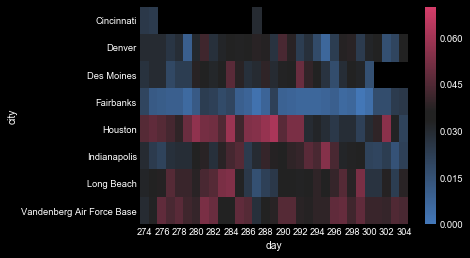

In [203]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0.035, 
            vmin = 0, 
            vmax = 0.07)
plt.yticks(rotation = 0)
plt.show()

### Using a custom categorical palette

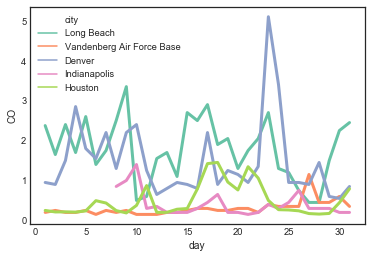

In [204]:
plt.style.use('seaborn-white')

# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

### Dealing with too many categories

In [205]:
df = pd.read_csv('pollution_tidy.csv')
df.head()

,state,city,pollutant,value,year,month,day
0,Alaska,Fairbanks,CO,0.315,2014,7,182
1,Alaska,Fairbanks,NO2,4.100,2014,7,182
2,Alaska,Fairbanks,O3,0.017,2014,7,182
3,Alaska,Fairbanks,SO2,4.250,2014,7,182
4,Alaska,Fairbanks,CO,0.305,2014,7,183


In [206]:
df['city_pol'] = df.city + ' ' + df.pollutant
city_pol_month = df[['city_pol', 'month', 'value']]
city_pol_month.head()

,city_pol,month,value
0,Fairbanks CO,7,0.315
1,Fairbanks NO2,7,4.100
2,Fairbanks O3,7,0.017
3,Fairbanks SO2,7,4.250
4,Fairbanks CO,7,0.305


/Users/gustavorodriguessilveira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


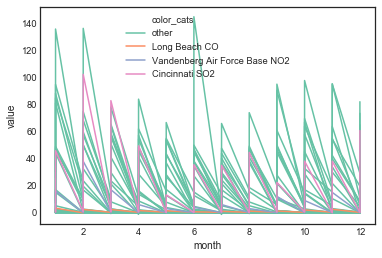

In [207]:
# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)
plt.show()

### Coloring ordinal categories

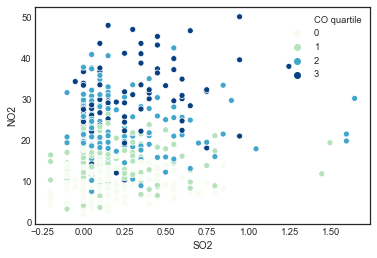

In [208]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()

### Choosing the right variable to encode with color

In [209]:
max_pollutant_values = df[['city', 'year', 'pollutant', 'state', 'value', 'month', 'day']]
max_pollutant_values = max_pollutant_values.groupby(['city', 'year', 'pollutant', 'state', 'month', 'day'])['value'].agg('max').reset_index()
df.head()

,state,city,pollutant,value,year,month,day,city_pol
0,Alaska,Fairbanks,CO,0.315,2014,7,182,Fairbanks CO
1,Alaska,Fairbanks,NO2,4.100,2014,7,182,Fairbanks NO2
2,Alaska,Fairbanks,O3,0.017,2014,7,182,Fairbanks O3
3,Alaska,Fairbanks,SO2,4.250,2014,7,182,Fairbanks SO2
4,Alaska,Fairbanks,CO,0.305,2014,7,183,Fairbanks CO


/Users/gustavorodriguessilveira/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


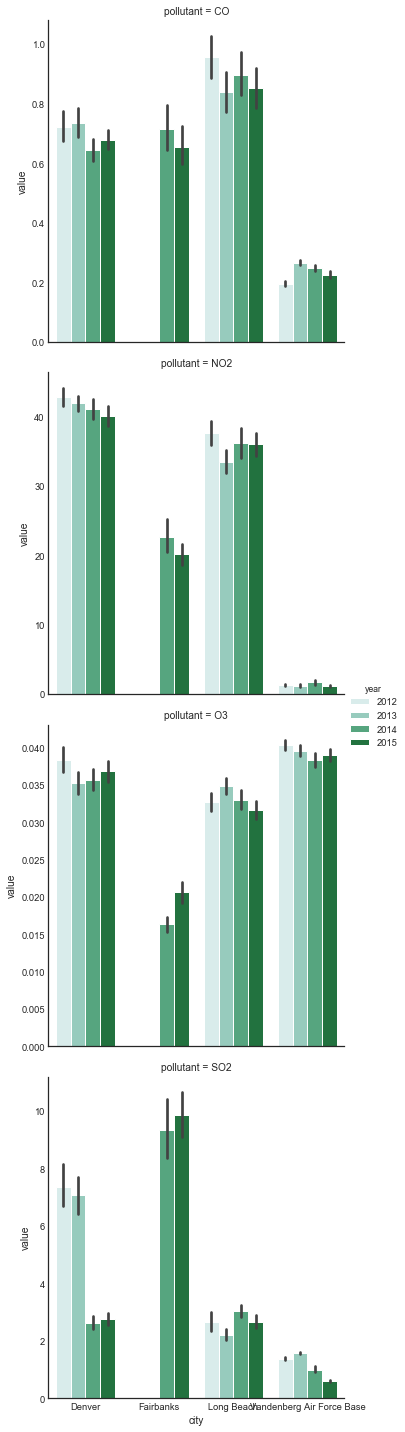

In [210]:
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()
f

## Showing uncertainty

### Basic confidence intervals

In [211]:
average_ests = pd.read_csv('average_ests.csv')
average_ests.head()

,pollutant,mean,std_err,y,seen
0,CO,0.351911,0.033563,95% Interval,0.40
1,NO2,19.021429,2.200518,95% Interval,16.00
2,O3,0.043982,0.001822,95% Interval,0.05
3,SO2,0.207143,0.037518,95% Interval,0.15


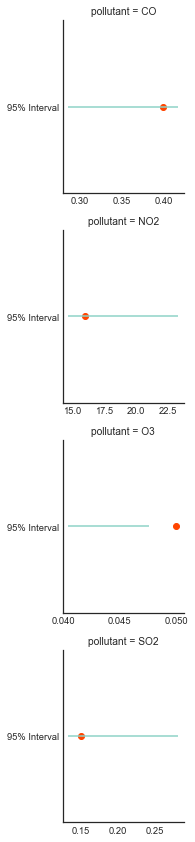

In [212]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('')

plt.show()

### Annotating confidence intervals

In [213]:
diffs_by_year = pd.read_csv('diffs_by_year.csv')
diffs_by_year.year = diffs_by_year.year.astype('str')
diffs_by_year.head()

,year,mean,std_err,lower,upper
0,2013,0.840820,0.870135,-0.864645,2.546284
1,2014,-1.337625,0.761541,-2.830245,0.154996
2,2015,-0.649327,0.618175,-1.860950,0.562295


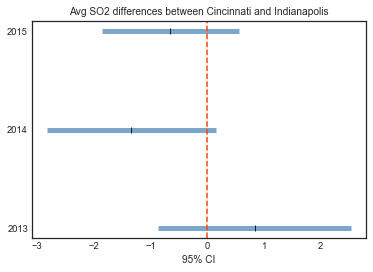

In [214]:
# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

### Making a confidence band

In [215]:
df = pollution[['city', 'day', 'NO2']]
df = df.groupby(['city', 'day'])['NO2'].agg(['mean', 'std']).reset_index()
df['lower'] = df['mean'] - 1.96 * df['std']
df['upper'] = df['mean'] + 1.96 * df['std']
vandenberg_NO2 = df.query("city == 'Vandenberg Air Force Base'")
vandenberg_NO2.head()

,city,day,mean,std,lower,upper
2370,Vandenberg Air Force Base,1,2.25,1.258306,-0.216279,4.716279
2371,Vandenberg Air Force Base,2,1.50,0.577350,0.368393,2.631607
2372,Vandenberg Air Force Base,3,3.50,3.109126,-2.593888,9.593888
2373,Vandenberg Air Force Base,4,2.25,0.957427,0.373443,4.126557
2374,Vandenberg Air Force Base,5,3.00,1.414214,0.228141,5.771859


/Users/gustavorodriguessilveira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gustavorodriguessilveira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


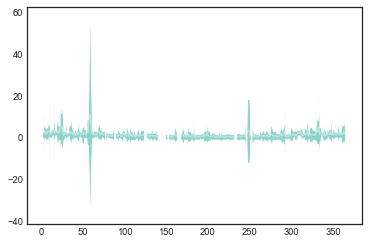

In [216]:
# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()

### Separating a lot of bands

In [217]:
df = pollution[['city', 'day', 'SO2']]
df = df.groupby(['city', 'day'])['SO2'].agg(['mean', 'std']).reset_index()
df['lower'] = df['mean'] - 1.96 * df['std']
df['upper'] = df['mean'] + 1.96 * df['std']
eastern_SO2 = df.query("city in ['Cincinnati','Des Moines', 'Houston', 'Indianapolis']")
eastern_SO2.head()

,city,day,mean,std,lower,upper
0,Cincinnati,1,5.166667,2.168141,0.917111,9.416222
1,Cincinnati,2,4.750000,2.262742,0.315026,9.184974
2,Cincinnati,3,2.400000,2.616295,-2.727938,7.527938
3,Cincinnati,4,10.650000,9.192388,-7.367081,28.667081
4,Cincinnati,5,13.475000,3.429468,6.753243,20.196757


<Figure size 1152x720 with 0 Axes>

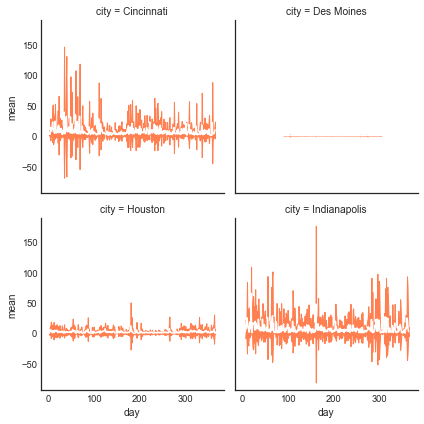

In [218]:
plt.figure(figsize = (16, 10))

# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')

plt.show()

### Cleaning up bands for overlaps

In [219]:
SO2_compare = df

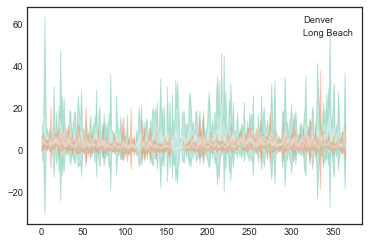

In [220]:
for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
                     color = color, alpha = 0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data = city_data, label = city,
             color = 'white', alpha = 0.25)

plt.legend()
plt.show()

### 90, 95, and 99% intervals

In [221]:
import statsmodels.api as sm

pollution['intercept'] = 1
lr = sm.OLS(pollution['SO2'], pollution[['intercept', 'day', 'CO', 'NO2', 'O3']])
pollution_model = lr.fit() 

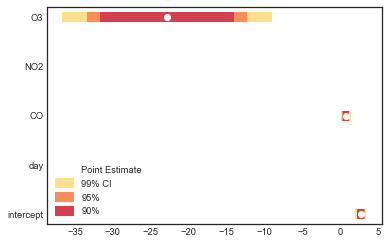

In [222]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

plt.legend(loc = 'lower left')
plt.show() 

### 90 and 95% bands

In [223]:
cinci_13_no2 = pd.read_csv('cinci_13_no2.csv')
cinci_13_no2.head()

,day,mean,std_err
0,82,25.425,1.447795
1,83,25.250,1.429051
2,84,25.425,1.435656
3,85,25.275,1.454728
4,86,25.025,1.438092


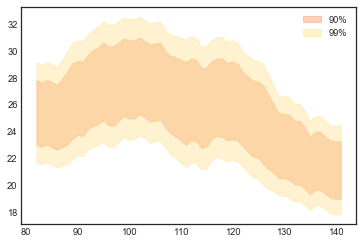

In [224]:
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()

### Using band thickness instead of coloring

In [225]:
rocket_model = pd.read_csv('rocket_model.csv')
rocket_model.head()

,pollutant,est,std_err
0,SO2,0.138185,0.034651
1,NO2,0.320121,0.049849
2,CO,0.084282,0.024758
3,O3,0.565368,0.022191


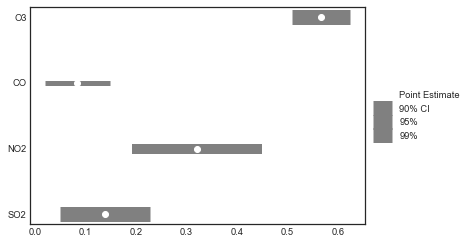

In [226]:
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = sizes, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

### The bootstrap histogram

In [227]:
pollution.head()

,state,city,year,month,day,CO,NO2,O3,SO2,CO quartile,intercept
0,Alaska,Fairbanks,2014,7,182,0.315,4.1,0.017,4.25,1,1
1,Alaska,Fairbanks,2014,7,183,0.305,4.2,0.016,4.65,1,1
2,Alaska,Fairbanks,2014,7,184,0.315,6.1,0.021,7.90,1,1
3,Alaska,Fairbanks,2014,7,185,0.295,14.0,0.030,8.05,1,1
4,Alaska,Fairbanks,2014,7,186,0.325,10.9,0.035,5.40,1,1


In [228]:
bootstrap = lambda data, n_boots: np.array([np.mean(np.random.choice(data,len(data))) for _ in range(n_boots)])

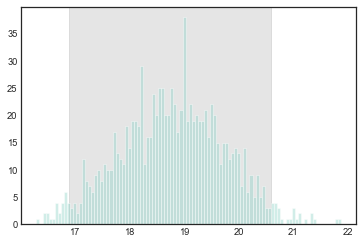

In [229]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False)

plt.show()

### Bootstrapped regressions

In [230]:
no2_so2 = pollution[['NO2', 'SO2']].iloc[6000:6060, :]
no2_so2_boot = no2_so2.sample(4340, replace = True)
no2_so2_boot = no2_so2_boot.reset_index()
no2_so2_boot = no2_so2_boot.rename(columns = {'index': 'sample'})
no2_so2_boot.columns

Index(['sample', 'NO2', 'SO2'], dtype='object')

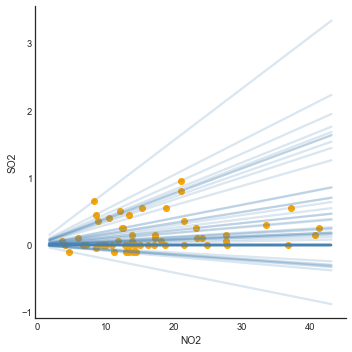

In [231]:
sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2, color = 'orange')

plt.show()

### Lots of bootstraps with beeswarms

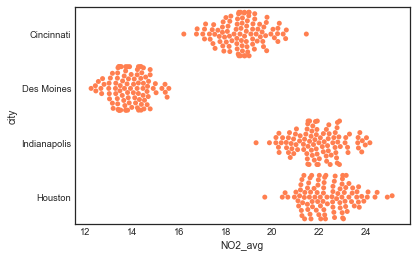

In [232]:
# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution[(pollution.city  ==  city) & (pollution.month == 5)].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral')

plt.show()

## Visualization in the data science workflow

### Looking at the farmers market data


In [233]:
markets = pd.read_csv('markets_cleaned.csv')
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [234]:
state_populations = pd.read_csv('census-state-populations.csv')

state_populations.columns = ['state', 'state_pop']

In [235]:
markets = pd.merge(markets, state_populations, left_on = 'state', right_on = 'state', how = 'left')
markets['num_items_sold'] = markets[['Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
       'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
       'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry',
       'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables',
       'WildHarvested', 'Wine']].sum(axis = 1)
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,state_pop,num_items_sold
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,1,0,1,0,1,1,0,0,626562.0,20
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,0,1,0,0,1,0,0,11594163.0,12
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,4832482.0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,0,1,0,0,1,0,0,6063589.0,13
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,1,0,1,0,0,1,0,0,19746227.0,10


In [236]:
# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
first_rows.head()

,0,1,2
FMID,1018261,1018318,1009364
name,Caledonia Farmers Market Association - Danville,Stearns Homestead Farmers' Market,106 S. Main Street Farmers Market
city,Danville,Parma,Six Mile
county,Caledonia,Cuyahoga,NaN
state,Vermont,Ohio,South Carolina


In [237]:
# Get descriptions of every column
col_descriptions = markets.describe(include = 'all',
                                    percentiles = [0.5]).transpose()
col_descriptions.head()

,count,unique,top,freq,mean,std,min,50%,max
FMID,8739,NaN,NaN,NaN,1.01067e+06,55328,1e+06,1.0069e+06,2.00004e+06
name,8739,8158,El Mercado Familiar,33,NaN,NaN,NaN,NaN,NaN
city,8699,4697,Chicago,62,NaN,NaN,NaN,NaN,NaN
county,8228,1503,Los Angeles,121,NaN,NaN,NaN,NaN,NaN
state,8739,53,California,760,NaN,NaN,NaN,NaN,NaN


### Scatter matrix of numeric columns

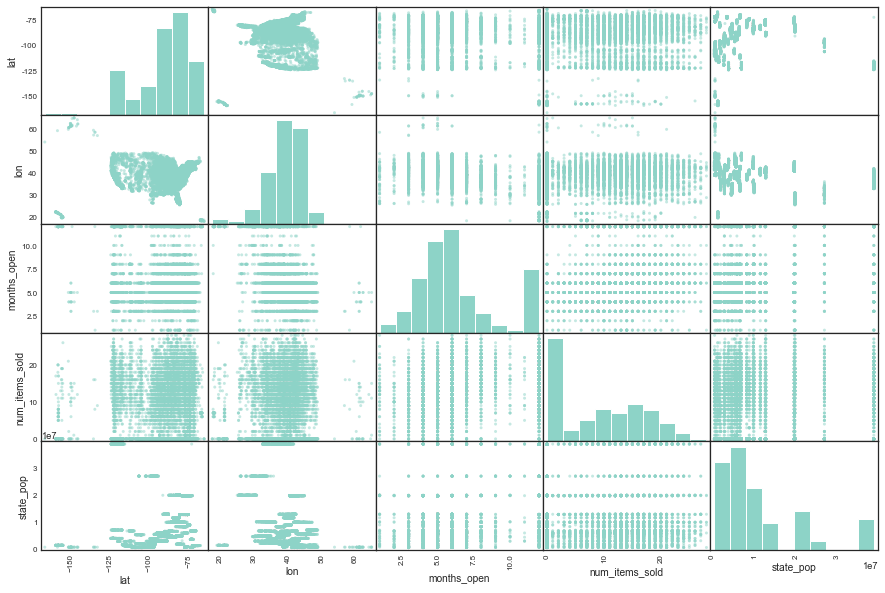

In [238]:
# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                             # Make figure large to show details
                             figsize = (15,10), 
                           # Lower point opacity to show overlap
                           alpha =0.5)

plt.show()

### Digging in with basic transforms

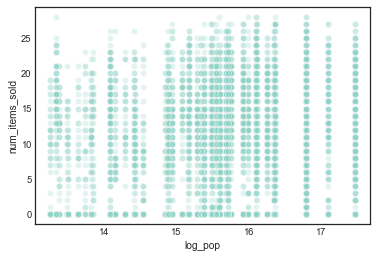

In [239]:
# Create a new logged population column 
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_pop', 
                  y = 'num_items_sold', 
                  # Reduce point opacity to show overlap
                  alpha = 0.25, 
                  data = markets)

plt.show()

### Is longitude related to months open?

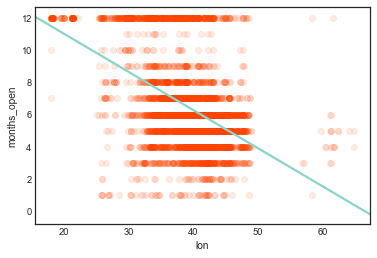

In [240]:
sns.regplot(x = 'lon', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.1, 'color':'orangered'}, 
            # Disable confidence band
            ci = False, 
            data = markets)

plt.show()

### What state is the most market-friendly?

In [241]:
markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: np.log(len(d)),
       'state_pop': lambda d: np.log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' })).dropna()

In [242]:
markets_and_pop.head()

,state,log_markets,log_pop
0,Alabama,4.941642,15.394361
1,Alaska,3.637586,13.509979
2,Arizona,4.521789,15.722306
3,Arkansas,4.691348,14.902849
4,California,6.633318,17.473995


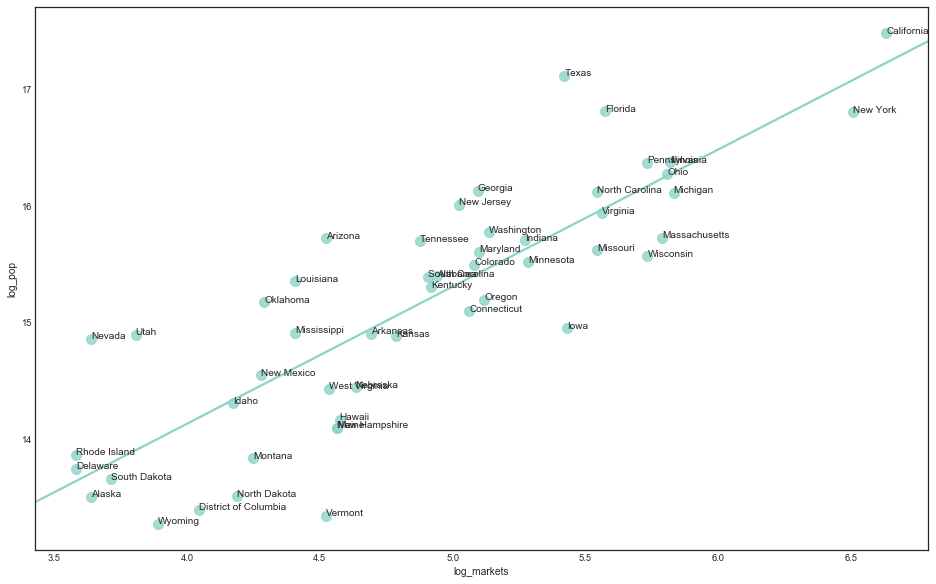

In [243]:
plt.figure(figsize = (16, 10))

g = sns.regplot(
    "log_markets", "log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':100},
    data = markets_and_pop)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():

    state, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets,log_pop), size = 10)

plt.show()

### Popularity of goods sold by state

In [244]:
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,state_pop,num_items_sold,log_pop
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,0,1,1,0,0,626562.0,20,13.348003
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,11594163.0,12,16.266012
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,4832482.0,0,15.390871
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,0,1,0,0,1,0,0,6063589.0,13,15.617812
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,1,0,0,1,0,0,19746227.0,10,16.798473


In [245]:
goods_by_state = pd.melt(markets, id_vars = ['state', 'name'], value_vars = ['Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
       'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
       'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry',
       'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables',
       'WildHarvested', 'Wine'], var_name = 'good')
goods_by_state = goods_by_state.groupby(['state', 'good'])['value'].mean().reset_index()
goods_by_state.columns = ['state', 'good', 'prop_selling']

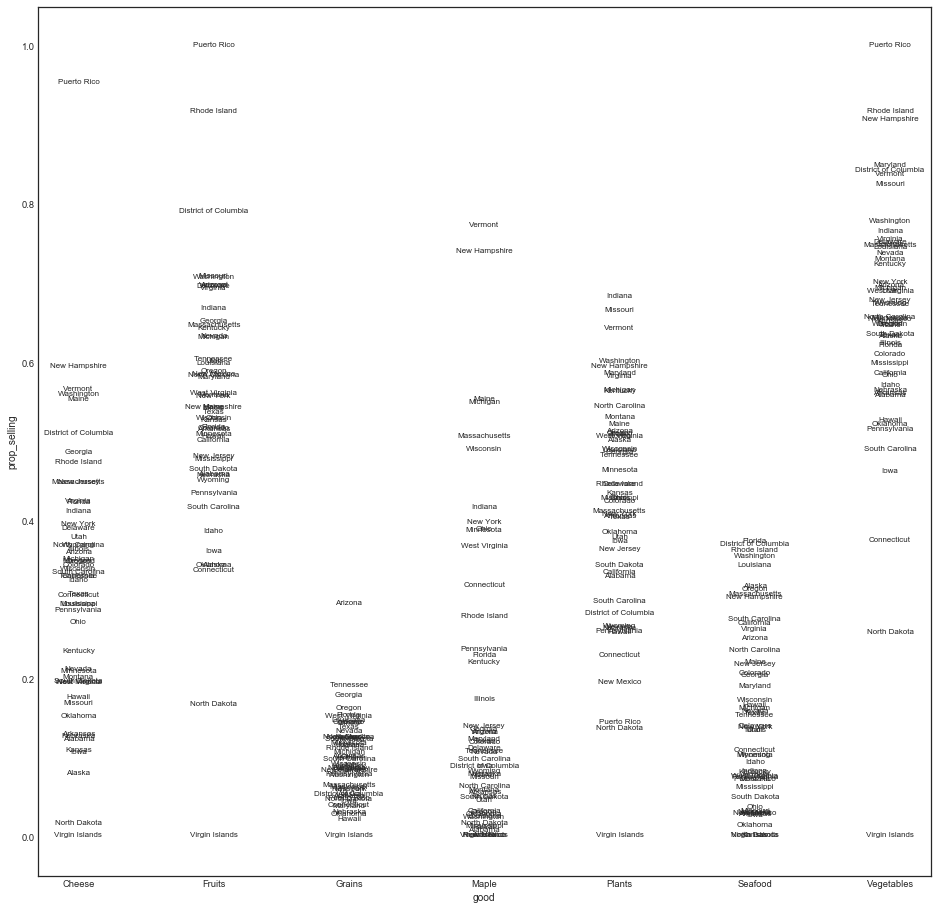

In [246]:
plt.figure(figsize = (16, 16))

# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0)

for _,row in goods_by_state_small.iterrows():
    g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 8)

plt.show()

### Stacking to find trends

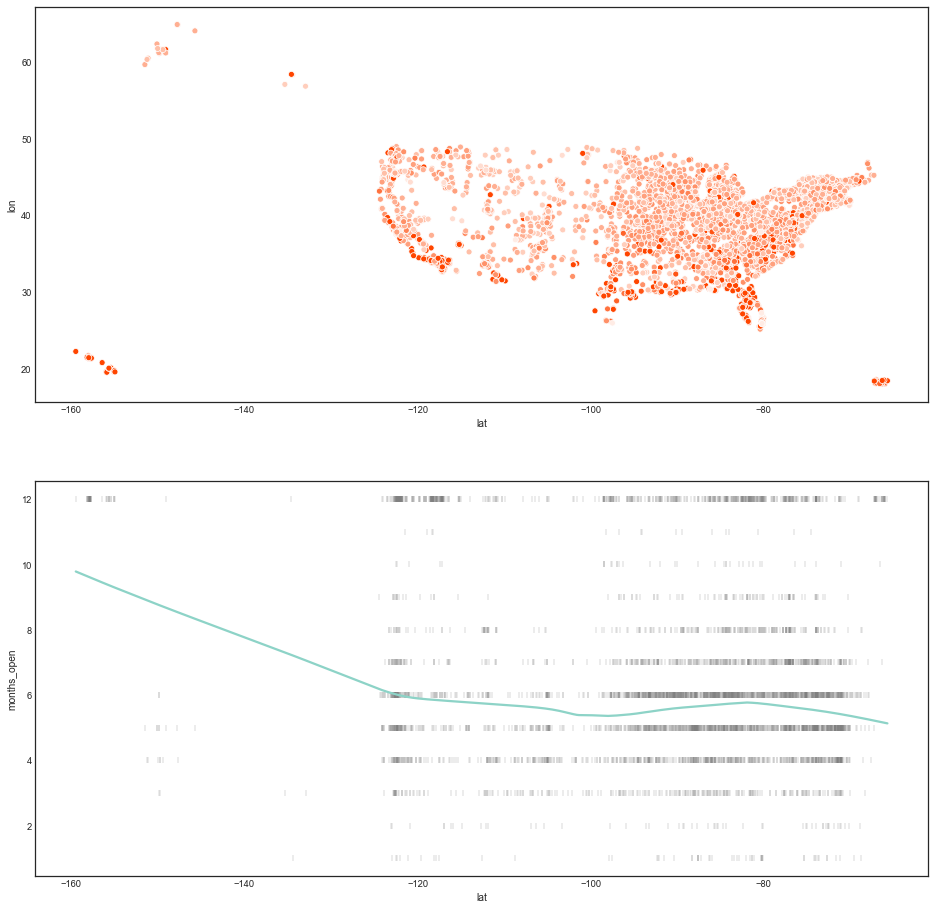

In [247]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 16))

# Draw location scatter plot on first plot
sns.scatterplot("lat", "lon", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot('lat', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)

plt.show()

### Using a plot as a legend

In [248]:
markets.columns

Index(['FMID', 'name', 'city', 'county', 'state', 'lat', 'lon', 'months_open',
       'Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
       'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
       'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry',
       'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables',
       'WildHarvested', 'Wine', 'state_pop', 'num_items_sold', 'log_pop'],
      dtype='object')

In [249]:
states = ['Vermont', 'Maryland', 'Texas']
aggregations = {'name' : 
                {'num_markets': lambda x: len(x), 
                 'log_markets': lambda x: np.log(len(x))}}
markets_by_state = markets[['state', 'state_pop', 'log_pop', 'name']].groupby(['state', 'state_pop', 'log_pop']).agg(aggregations).reset_index()
markets_by_state.columns = markets_by_state.columns.droplevel()
markets_by_state.columns = ['state', 'population', 'log_pop', 'num_markets', 'log_markets']
markets_by_state['people_per_market'] = markets_by_state.population / markets_by_state.num_markets
markets_by_state['is_selected'] = [x if x in states else 'other' for x in markets_by_state.state]
markets_by_state.head()

/Users/gustavorodriguessilveira/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,state,population,log_pop,num_markets,log_markets,people_per_market,is_selected
0,Alabama,4849377.0,15.394361,140,4.941642,34638.407143,other
1,Alaska,736732.0,13.509979,38,3.637586,19387.684211,other
2,Arizona,6731484.0,15.722306,92,4.521789,73168.304348,other
3,Arkansas,2966369.0,14.902849,109,4.691348,27214.394495,other
4,California,38802500.0,17.473995,760,6.633318,51055.921053,other


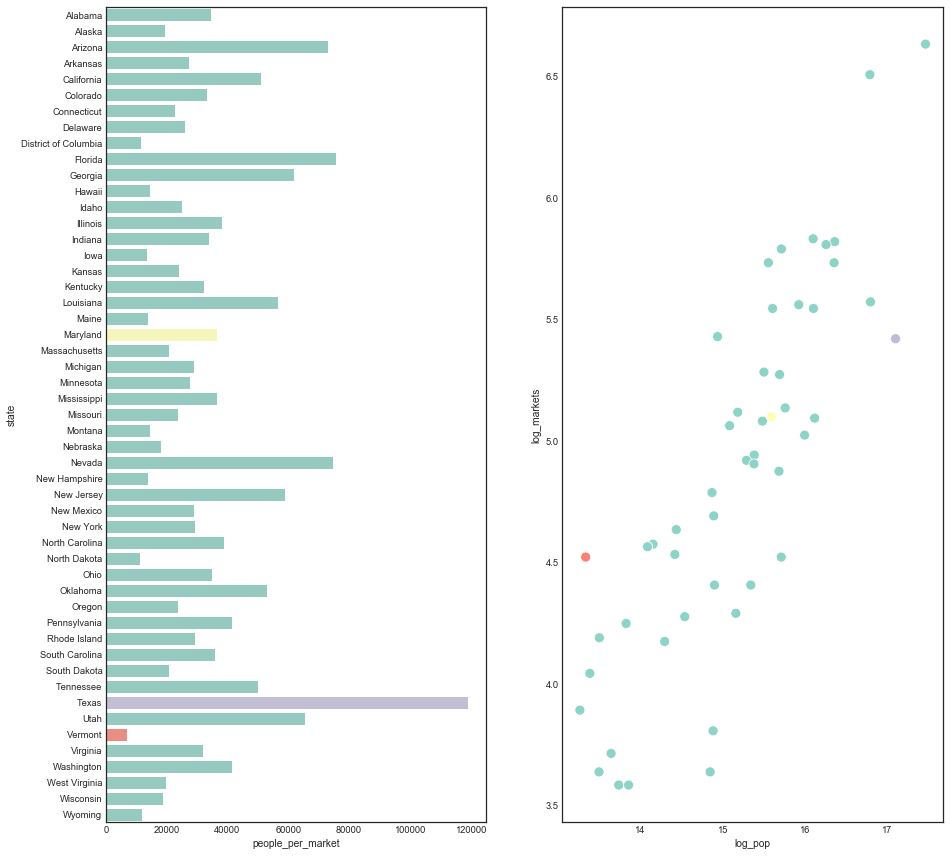

In [250]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_by_state, ax = ax1)

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove()
plt.show() 

### Cleaning up the background

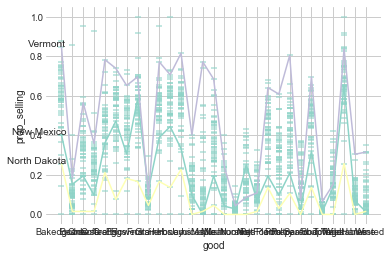

In [251]:
# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good','prop_selling', marker = '_', alpha = 0.7, data = goods_by_state)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot('good','prop_selling', 'state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop_selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(bottom = True, left = True)
plt.show()

### Remixing a plot

In [252]:
markets_by_month = pd.pivot_table(data = markets, index = 'state', columns = 'months_open', values = 'name', aggfunc = 'count').reset_index().set_index('state')
markets_by_month.columns.name = None
markets_by_month.replace(np.nan, 0, inplace = True)
markets_by_month = markets_by_month.apply(lambda x: x/x.sum())
markets_by_month.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
state,,,,,,,,,,,,
Alabama,0.016949,0.075472,0.049645,0.019257,0.006590,0.006555,0.013834,0.015625,0.000000,0.028571,0.0000,0.010896
Alaska,0.016949,0.000000,0.014184,0.009629,0.006590,0.001457,0.000000,0.000000,0.000000,0.000000,0.0000,0.002421
Arizona,0.016949,0.000000,0.007092,0.009629,0.003295,0.005827,0.013834,0.078125,0.009524,0.000000,0.0000,0.019370
Arkansas,0.016949,0.000000,0.000000,0.006878,0.008237,0.008740,0.025692,0.015625,0.019048,0.028571,0.0625,0.012107
California,0.101695,0.000000,0.046099,0.035763,0.042834,0.041515,0.051383,0.058594,0.104762,0.085714,0.2500,0.277240


In [253]:
state_by_lon = markets[['state', 'lon']].sort_values('lon', ascending = False).dropna()['state'].unique()
state_by_lon

array(['Alaska', 'North Dakota', 'Washington', 'Montana', 'Minnesota',
       'Idaho', 'Michigan', 'Maine', 'Wisconsin', 'Oregon',
       'South Dakota', 'Vermont', 'New York', 'Wyoming', 'New Hampshire',
       'Iowa', 'Nebraska', 'Massachusetts', 'Illinois', 'Pennsylvania',
       'Rhode Island', 'Connecticut', 'Ohio', 'California', 'Utah',
       'Indiana', 'New Jersey', 'Nevada', 'Colorado', 'Missouri',
       'West Virginia', 'Kansas', 'Delaware', 'Maryland', 'Virginia',
       'Kentucky', 'District of Columbia', 'New Mexico', 'Oklahoma',
       'Tennessee', 'North Carolina', 'Arkansas', 'Arizona', 'Texas',
       'South Carolina', 'Mississippi', 'Georgia', 'Alabama', 'Louisiana',
       'Florida', 'Hawaii', 'Puerto Rico', 'Virgin Islands'], dtype=object)

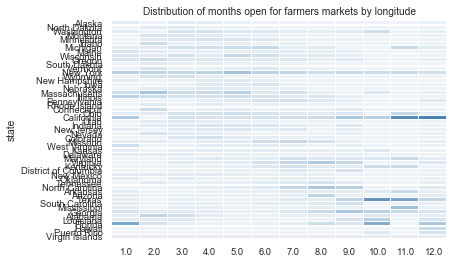

In [254]:
# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by longitude
g = sns.heatmap(markets_by_month.reindex(state_by_lon), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by longitude')
plt.show()

### Enhancing legibility

In [255]:
state_colors = ['steelblue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'orangered']
len(state_colors)

51

In [256]:
markets_by_state.head()

,state,population,log_pop,num_markets,log_markets,people_per_market,is_selected
0,Alabama,4849377.0,15.394361,140,4.941642,34638.407143,other
1,Alaska,736732.0,13.509979,38,3.637586,19387.684211,other
2,Arizona,6731484.0,15.722306,92,4.521789,73168.304348,other
3,Arkansas,2966369.0,14.902849,109,4.691348,27214.394495,other
4,California,38802500.0,17.473995,760,6.633318,51055.921053,other


In [257]:
markets_by_state.num_markets.shape

(51,)

Texas has a large population and relatively few farmers markets.


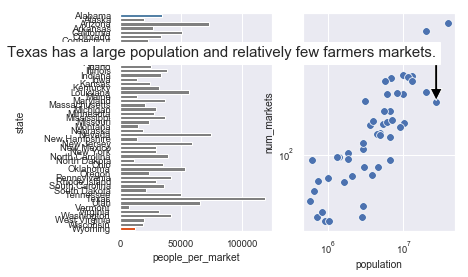

In [258]:
fig, (ax1, ax2) = plt.subplots(1, 2)

tx_message = 'Texas has a large population and relatively few farmers markets.'

# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', 
                    data = markets_by_state, s = 60, ax = ax2) # color = state_colors,

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
print(tx_message)
plt.show() 